In [152]:
import re
import string
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
#Inicializar diccionarios
def tokenizador(text):
    text = text.lower()
    intab = "áéíóú"
    outtab = "aeiou"
    str = text
    trantab = str.maketrans(intab, outtab)
    normalizado = str.translate(trantab)
    normalizado = re.sub(r'[^a-z]','', normalizado)
    return normalizado


def entrenar(dic, path):
    name ="languageIdentificationData/" + path 
    with open(name, encoding='iso-8859-1') as archivo:
        text = archivo.read()
    text = tokenizador(text)
    for char in text:
        dic[char] +=1
    return dic

def entrenar2(dic, path):
    name ="languageIdentificationData/" + path 
    with open(name, encoding='iso-8859-1') as archivo:
        text = archivo.read()
    text = tokenizador(text)
    for i in range(0,len(text)-1):
        dic[text[i] + text[i+1]] +=1
    return dic
    

def cargarTest(dic,text):
    for char in list(string.ascii_lowercase):
        dic[char] = 0
    text = tokenizador(text)
    for char in text:
        dic[char] +=1
    return dic
    
def cargarTest2(dic,text):
    for element in dic:
        dic[element] = 0
    text = tokenizador(text)
    for i in range(0,len(text)-1):
        dic[text[i] + text[i+1]] +=1
    return dic

def cargar2():
    chars =set()
    with open("languageIdentificationData/training/English", encoding='iso-8859-1') as archivo:
        text_en = archivo.read()
    text = tokenizador(text_en)
    with open("languageIdentificationData/training/French", encoding='iso-8859-1') as archivo:
        text_fr = archivo.read()
    text += tokenizador(text_fr)
    with open("languageIdentificationData/training/Italian", encoding='iso-8859-1') as archivo:
        text_it = archivo.read()
    text += tokenizador(text_it)
    for i in range(0,len(text)-1):
        chars.add(text[i] + text[i+1])
    with open("languageIdentificationData/test", encoding='iso-8859-1') as archivo:
        text_test = archivo.read()
    text += tokenizador(text_test)
    for i in range(0,len(text)-1):
        chars.add(text[i] + text[i+1])
    return chars
    
    

In [153]:
en = {}
fr = {}
it = {}
test={}

for letra in list(string.ascii_lowercase):
    en[letra] = 0
    fr[letra] = 0
    it[letra] = 0
    test[letra] =0

In [154]:
en = entrenar(en,"training/English")
fr = entrenar(fr,"training/French")
it = entrenar(it,"training/Italian")
array_en = np.array(list(en.values()))
array_fr = np.array(list(fr.values()))
array_it = np.array(list(it.values()))

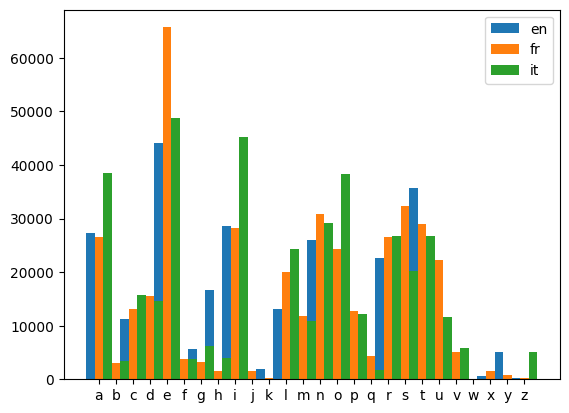

In [155]:
fig, ax = plt.subplots()

bar_width = 0.50
x = np.arange(len(string.ascii_lowercase))

ax.bar(x - bar_width, array_en, bar_width, label='en')
ax.bar(x, array_fr, bar_width, label='fr')
ax.bar(x + bar_width, array_it, bar_width, label='it')

ax.set_xticks(x)
ax.set_xticklabels(string.ascii_lowercase)
ax.legend()

plt.show()

In [156]:
with open("languageIdentificationData/test", encoding='iso-8859-1') as archivo:
    for linea in archivo:
        test = cargarTest(test,linea)
        array_test = np.array(list(test.values()))
        matriz = {"en":array_en,"fr":array_fr,"it":array_it,"test":array_test }
        df = pd.DataFrame(matriz)
        en_cor = np.corrcoef(array_en,array_test)[0][1]
        fr_cor = np.corrcoef(array_fr,array_test)[0][1]
        it_cor = np.corrcoef(array_it,array_test)[0][1] 
        match np.argmax([en_cor, fr_cor, it_cor]):
            case 0:
                print("English")
            case 1:
                print("French")
            case 2:
                print("Italian")

French
English
Italian
French
French
Italian
English
English
French
French
English
Italian
Italian
English
French
English
French
French
Italian
English
French
French
Italian
French
Italian
English
English
French
English
English
English
English
English
French
French
Italian
French
French
French
English
Italian
French
Italian
French
French
French
French
Italian
French
Italian
Italian
Italian
Italian
Italian
Italian
Italian
Italian
English
French
French
Italian
French
English
Italian
English
French
French
English
Italian
Italian
English
Italian
English
Italian
English
French
English
Italian
French
Italian
Italian
English
Italian
English
French
English
Italian
English
English
French
Italian
English
French
English
Italian
Italian
Italian
Italian
French
English
French
Italian
French
English
French
French
French
French
French
French
French
French
French
English
French
English
Italian
English
Italian
English
Italian
Italian
French
English
English
French
Italian
English
Italian
Italian
French
F

In [157]:
chars = cargar2()

In [158]:
en2 = {}
fr2 = {}
it2 ={}
test2 ={}
for element in chars:
    en2[element] = 0
    fr2[element] = 0
    it2[element] = 0
    test2[element] =0

In [159]:
en2 = entrenar2(en2,"training/English")
fr2 = entrenar2(fr2,"training/French")
it2 = entrenar2(it2,"training/Italian")
array_en = np.array(list(en2.values()))
array_fr = np.array(list(fr2.values()))
array_it = np.array(list(it2.values()))

In [161]:
with open("languageIdentificationData/test", encoding='iso-8859-1') as archivo:
    for linea in archivo:
        test2 = cargarTest2(test2,linea)
        array_test = np.array(list(test2.values()))
        matriz = {"en":array_en,"fr":array_fr,"it":array_it,"test":array_test }
        df = pd.DataFrame(matriz)
        en_cor = np.corrcoef(array_en,array_test)[0][1]
        fr_cor = np.corrcoef(array_fr,array_test)[0][1]
        it_cor = np.corrcoef(array_it,array_test)[0][1] 
        match np.argmax([en_cor, fr_cor, it_cor]):
            case 0:
                print("English")
            case 1:
                print("French")
            case 2:
                print("Italian")

Italian
English
Italian
French
French
English
English
English
French
French
English
Italian
Italian
English
French
English
French
French
Italian
English
Italian
French
Italian
French
Italian
English
English
English
English
English
English
English
English
French
French
Italian
French
English
French
Italian
Italian
French
Italian
French
French
Italian
French
French
French
Italian
Italian
Italian
Italian
French
Italian
Italian
Italian
English
French
French
Italian
French
English
Italian
Italian
French
French
English
Italian
Italian
English
Italian
English
English
English
English
English
Italian
Italian
Italian
Italian
English
Italian
English
Italian
English
French
English
English
French
Italian
Italian
French
English
Italian
Italian
Italian
Italian
French
English
French
Italian
French
English
French
French
French
French
French
French
French
French
French
English
French
English
Italian
Italian
Italian
Italian
Italian
Italian
English
English
English
French
Italian
English
French
Italian
Fre